In [26]:
"""
For the locations in which Kiva has active loans, your objective is to pair Kiva's data with additional data sources 
to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate
the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given
area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector,
or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them.
Strong submissions will attempt to map vaguely described locations to more accurate geocodes.
"""
pass

Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [32]:
# details loans to individuals
kiva_loans = pd.read_csv("C:/Users/MANU/Desktop/Datasets/Kiva/kiva_loans.csv")

# contains the mpi which depicts the poverty index of regios
kiva_mpi_region_locations = pd.read_csv("C:/Users/MANU/Desktop/Datasets/Kiva/kiva_mpi_region_locations.csv")

# Depicts the type of loan/loan purpose
loan_theme_ids = pd.read_csv("C:/Users/MANU/Desktop/Datasets/Kiva/loan_theme_ids.csv")

loan_themes_by_region = pd.read_csv("C:/Users/MANU/Desktop/Datasets/Kiva/loan_themes_by_region.csv")

Understanding the data size we have

In [12]:
print('kiva loans data: {}'.format(kiva_loans.shape))
print('kiva mpi region locations data: {}'.format(kiva_mpi_region_locations.shape))
print('loan theme ids: {}'.format(loan_theme_ids.shape))
print('kiva loan themes by region: {}'.format(loan_themes_by_region.shape))

kiva loans data: (671205, 20)
kiva mpi region locations data: (2772, 9)
loan theme ids: (779092, 4)
kiva loan themes by region: (15736, 21)


In [28]:
kiva_loans.sample(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
358643,1005939,225.0,225.0,Home Appliances,Personal Use,to purchase TerraClear water filters so they c...,LA,Lao People's Democratic Republic,Laos,LAK,393.0,2016-01-08 23:13:33+00:00,2016-01-01 08:00:00+00:00,2016-01-11 16:32:15+00:00,10.0,9,user_favorite,"female, male, female, female",bullet,2016-01-08
171379,819900,250.0,500.0,Food Stall,Food,"to invest in sweets, soft drinks, juices, tabl...",SV,El Salvador,NaN,USD,81.0,2014-12-23 15:02:14+00:00,2014-11-24 08:00:00+00:00,NaN,14.0,4,#Parent,male,monthly,2014-12-23
367261,1013786,4475.0,4475.0,General Store,Retail,to purchase more dry food and general goods to...,VN,Vietnam,04 Đông Sơn,VND,121.0,2016-01-26 03:49:19+00:00,2016-01-12 08:00:00+00:00,2016-02-23 01:41:19+00:00,14.0,95,"#Parent, #Repeat Borrower, #Woman Owned Biz, u...","female, female, female, female, female, female...",monthly,2016-01-26
24306,676863,400.0,400.0,General Store,Retail,"to buy packs of salt, biscuits and beverages.",PK,Pakistan,Gujranwala,PKR,245.0,2014-02-26 11:26:18+00:00,2014-02-21 08:00:00+00:00,2014-03-13 12:50:02+00:00,14.0,10,NaN,female,monthly,2014-02-26
404417,1050917,500.0,500.0,Cattle,Agriculture,"to buy, breed and sell cattle.",EC,Ecuador,San Gabriel,USD,188.0,2016-04-07 13:25:52+00:00,2016-04-06 07:00:00+00:00,2016-04-12 12:26:29+00:00,20.0,20,"volunteer_pick, #Animals",female,monthly,2016-04-07


In [16]:
kiva_mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [8]:
loan_theme_ids.sample(5)

,id,Loan Theme ID,Loan Theme Type,Partner ID
158131,812873,a1050000004GHPs,Bridge/Income Smoothing,288.0
304201,960625,a1050000002XlHG,Agriculture,138.0
404142,1061272,a1050000005nzX8,Water,311.0
89796,743136,a1050000002YegY,General,183.0
61593,714716,a1050000000smst,General,78.0


In [15]:
loan_themes_by_region.sample(3)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
11825,217,ACEP Cameroun,General Financial Inclusion,a1050000000T3oX,Extreme Poverty,Cameroon,No,bertoua,NaN,CMR,...,28575,"bertoua, Cameroon","[(4.5791946, 13.6767958)]",Bertoua; Lom -Et- Djerem; East; Cameroon,"(4.5791946, 13.6767958)",4.579195,13.676796,"Est, Cameroon","(3.950512799999999, 13.914399)",32.0
15488,484,Cooperativa de Ahorro y CrÍ©dito Norandino,General Financial Inclusion,a1050000007S5nj,Organic Agriculture,Peru,No,Rumibamba-Las Pirias,NaN,PER,...,1050,"Rumibamba-Las Pirias, Peru",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PER,NaN,99.0
2642,120,AsociaciÍ_n Alternativa Para el Desarrollo Int...,General Financial Inclusion,a1050000000wf0S,General,Nicaragua,No,Managua,"(12.1508333, -86.2683333)",NIC,...,680375,"Managua, Nicaragua","[(12.1149926, -86.2361744)]",Managua; Managua Department; Nicaragua,"(12.1149926, -86.2361744)",12.114993,-86.236174,"Managua, Nicaragua","(12.1149926, -86.2361744)",40.0


### Exploring and cleaning individual datasets
###### 1. Kiva loans data

In [27]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Observations:
1. The dataset consists mostly of float, int and object dtypes. Some conversions will be necessary.
2. Some features are redundant and unnecessary
3. Presence of missing values that require processing

In [29]:
kiva_loans.sample(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
228406,876144,2525.0,2525.0,Milk Sales,Food,to buy large quantities of milk to sell.,PY,Paraguay,PILAR,PYG,58.0,2015-04-26 21:34:07+00:00,2015-03-26 07:00:00+00:00,2015-05-11 18:38:20+00:00,9.0,49,"#Parent, #Woman Owned Biz","female, female, female, female, female, female...",irregular,2015-04-26
576611,1238048,500.0,500.0,General Store,Retail,to purchase supplies of various goods to resell,CD,The Democratic Republic of the Congo,UVIRA,USD,402.0,2017-02-14 09:10:34+00:00,2017-01-24 08:00:00+00:00,2017-03-22 16:20:33+00:00,8.0,17,#Supporting Family,"male, female",monthly,2017-02-14
458717,1118639,1075.0,1075.0,Fish Selling,Food,to buy fish and salt to make dried fish and se...,PH,Philippines,"Roxas City, Capiz",PHP,145.0,2016-07-19 02:46:08+00:00,2016-06-24 07:00:00+00:00,2016-07-27 19:17:23+00:00,6.0,2,NaN,female,irregular,2016-07-19
351798,998679,100.0,100.0,Home Appliances,Personal Use,to buy a water filter to provide safe drinking...,KH,Cambodia,Kandal,KHR,311.0,2015-12-22 02:52:14+00:00,2015-12-15 08:00:00+00:00,2015-12-23 19:16:46+00:00,8.0,4,NaN,"female, female",monthly,2015-12-22
150505,800696,650.0,650.0,Farming,Agriculture,to purchase hybrid seeds and fertilizer for th...,KE,Kenya,Kakamega North,KES,202.0,2014-11-18 19:32:31+00:00,2015-02-01 08:00:00+00:00,2014-11-27 03:05:32+00:00,11.0,21,"user_favorite, #Repeat Borrower, #Parent, #Veg...","female, female, female, male, female, female, ...",bullet,2014-11-18


I will delete 'activity', 'use', 'country_code' and 'tags' columns that i think are redundant and unnecessary.

In [33]:
# deleting the above mentioned columns
kiva_loans.drop(['activity', 'use', 'country_code', 'tags'], axis=1, inplace=True)

kiva_loans.head()

,id,funded_amount,loan_amount,sector,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Food,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular,2014-01-01
1,653053,575.0,575.0,Transportation,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,female,bullet,2014-01-01
3,653063,200.0,200.0,Arts,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular,2014-01-01
4,653084,400.0,400.0,Food,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly,2014-01-01


Converting columns into the proper types

In [48]:
# Converting 'sector', 'country', 'region','currency', 'currency', 'borrower_genders', 'repayment_interval' to Category type
to_category_type = ['sector', 'country', 'region','currency', 'currency', 'borrower_genders', 'repayment_interval']
for col in to_category_type:
    kiva_loans[col] = kiva_loans[col].astype(dtype='category')

# Converting 'term_in_months' to int64 type
kiva_loans['term_in_months'] = kiva_loans['term_in_months'].astype(dtype='int64')


# Converting 'posted_time', 'disbursed_time', 'funded_time', 'date' to datetime type
to_datetime_type = ['posted_time', 'disbursed_time', 'funded_time', 'date']
for col in to_datetime_type:
    kiva_loans[col] = pd.to_datetime(kiva_loans[col])
    
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   sector              671205 non-null  category           
 4   country             671205 non-null  category           
 5   region              614405 non-null  category           
 6   currency            671205 non-null  category           
 7   partner_id          657698 non-null  float64            
 8   posted_time         671205 non-null  datetime64[ns, UTC]
 9   disbursed_time      668809 non-null  datetime64[ns, UTC]
 10  funded_time         622874 non-null  datetime64[ns, UTC]
 11  term_in_months      671205 non-null  int64              
 12  lender_count    

Checking on missing values

In [60]:
# total number of missing values
kiva_loans.isnull().sum().sum()

125255

In [61]:
# missin values per column
kiva_loans.isnull().sum()

id                        0
funded_amount             0
loan_amount               0
sector                    0
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
date                      0
dtype: int64

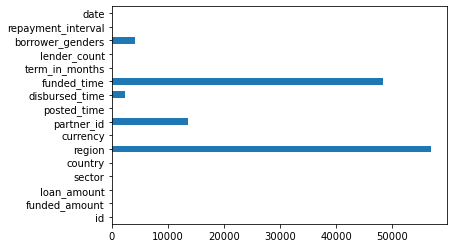

In [62]:
# visualizing missing values per column
kiva_loans.isnull().sum().plot(kind='barh')
plt.show()